Your task is to write functions (Python/Excel is preferred) to reformat the timestamp column and
complete the `customer_satisfaction` column. Then, create a visualization that displays the Satisfaction
Rate by date.


#Import thu vien va dataset

In [33]:
#Import thu vien va dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('https://drive.google.com/uc?export=download&id=1SBzWr-CoZcevQPyEhEk-nRnr6ryeHGr4')
raw_data= data.copy()
raw_data.head()

,ID,Timestamp,UI_version,source,messages,customer_satisfaction
0,50424,11/20/2023 6:04:02,v1,fb_messenger,"{\n ""chatbot"": ""Welcome! If you're look...",not sastisfy
1,50425,11/20/2023 6:11:05,v1,website,"{\n ""customer"": ""I thought this razor w...",sastisfy
2,50426,11/20/2023 6:14:57,v1,website,"{\n ""customer"": ""Hey, I need to report ...",sastisfy
3,50427,11/20/2023 6:26:05,v1.1.2,website,"{\n ""customer"": ""Can you point me towar...",sastisfy
4,50428,11/20/2023 6:26:19,v2.sp,tiktok,"{\n ""chatbot"": ""Good day! How can I hel...",sastisfy


In [34]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     2016 non-null   int64 
 1   Timestamp              2016 non-null   object
 2   UI_version             2016 non-null   object
 3   source                 2016 non-null   object
 4   messages               2016 non-null   object
 5   customer_satisfaction  397 non-null    object
dtypes: int64(1), object(5)
memory usage: 94.6+ KB


#Format timestamp columns

## Check format timestamp

In [35]:
from datetime import datetime

def check_format_timestamp(df=raw_data, timestamp_columns='Timestamp'):
  for i in raw_data.loc[:, 'Timestamp']:
    a=0

    # initializing format
    format = np.array(["%m/%d/%Y %H:%M:%S", "%b/%d/%Y %H:%M:%S","%A, %B %d, %Y, %H:%M:%S %p", "%b/%d/%y %H:%M:%S"])

    for j in format:

    # using try-except to check for truth value
      try:
          res = bool(datetime.strptime(i, j))
      except ValueError:
          a +=1
    if a>3:
      print(i)

check_format_timestamp(raw_data, 'Timestamp')
#Co 4 tong cong 4 kieu formate_date

##Adjust timestamp columns


In [36]:
def adjust_format_timestamp(data=raw_data, timestamp_columns='Timestamp'):
  timestamp_list=[]
  format = np.array(["%m/%d/%Y %H:%M:%S", "%b/%d/%Y %H:%M:%S","%A, %B %d, %Y, %H:%M:%S %p", "%b/%d/%y %H:%M:%S"])

  for i in data.loc[:, timestamp_columns]:

    for j in format:
      try :
        i= datetime.strptime(i, j).strftime('%Y-%m-%d')
        timestamp_list.append(i)
        break

      except ValueError:
        continue

  return tuple(timestamp_list)

#Change type to datetime on 'Timestamp'
raw_data['Timestamp']=pd.to_datetime( adjust_format_timestamp(raw_data, 'Timestamp'))




In [37]:
raw_data.info()
raw_data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2016 non-null   int64         
 1   Timestamp              2016 non-null   datetime64[ns]
 2   UI_version             2016 non-null   object        
 3   source                 2016 non-null   object        
 4   messages               2016 non-null   object        
 5   customer_satisfaction  397 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 94.6+ KB


,ID,Timestamp,UI_version,source,messages,customer_satisfaction
0,50424,2023-11-20,v1,fb_messenger,"{\n ""chatbot"": ""Welcome! If you're look...",not sastisfy
1,50425,2023-11-20,v1,website,"{\n ""customer"": ""I thought this razor w...",sastisfy
2,50426,2023-11-20,v1,website,"{\n ""customer"": ""Hey, I need to report ...",sastisfy
3,50427,2023-11-20,v1.1.2,website,"{\n ""customer"": ""Can you point me towar...",sastisfy
4,50428,2023-11-20,v2.sp,tiktok,"{\n ""chatbot"": ""Good day! How can I hel...",sastisfy
5,50429,2023-11-20,v2.sp,fb_messenger,"{\n ""chatbot"": ""Welcome to our store! C...",sastisfy
6,50430,2023-11-20,v2.0,fb_messenger,"{\n ""chatbot"": ""Good day! How can I ass...",sastisfy
7,50431,2023-11-20,v1.1.1,fb_messenger,"{\n ""customer"": ""Hey, I'd like to buy a...",sastisfy
8,50432,2023-11-20,v1.1.1,tiktok,"{\n ""customer"": ""Hey, can I use your el...",sastisfy
9,50433,2023-11-20,v1.1.2,website,"{\n ""chatbot"": ""Hello! Welcome to our s...",not happy


# Complete 'customer satisfication' column

In [38]:
#Filter customer message: filter nhung review cua khach hang, ko tinh cua chatbot
def filter_customer_message(df=raw_data, message_columns='messages'):
  customer_message_list=[]

  for i in df.loc[:, message_columns]:
    i= list(i.split('\n        '))

    for j in i:
      if '"chatbot"' in j:
        i.remove(j)

    customer_message_list.append(np.array(i))

  df['messages']=customer_message_list
  return df

filter_customer_data=filter_customer_message(raw_data, 'messages')
filter_customer_data.head()



,ID,Timestamp,UI_version,source,messages,customer_satisfaction
0,50424,2023-11-20,v1,fb_messenger,"[{, ""customer"": ""I want to know how to get a s...",not sastisfy
1,50425,2023-11-20,v1,website,"[{, ""customer"": ""I thought this razor would be...",sastisfy
2,50426,2023-11-20,v1,website,"[{, ""customer"": ""Hey, I need to report an issu...",sastisfy
3,50427,2023-11-20,v1.1.2,website,"[{, ""customer"": ""Can you point me towards an e...",sastisfy
4,50428,2023-11-20,v2.sp,tiktok,"[{, ""customer"": ""The trimmer attachment isn't ...",sastisfy


##EDA

In [39]:

filter_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2016 non-null   int64         
 1   Timestamp              2016 non-null   datetime64[ns]
 2   UI_version             2016 non-null   object        
 3   source                 2016 non-null   object        
 4   messages               2016 non-null   object        
 5   customer_satisfaction  397 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 94.6+ KB


In [40]:
filter_customer_data['messages']=filter_customer_data['messages'].astype(str)

<Axes: xlabel='customer_satisfaction', ylabel='count'>

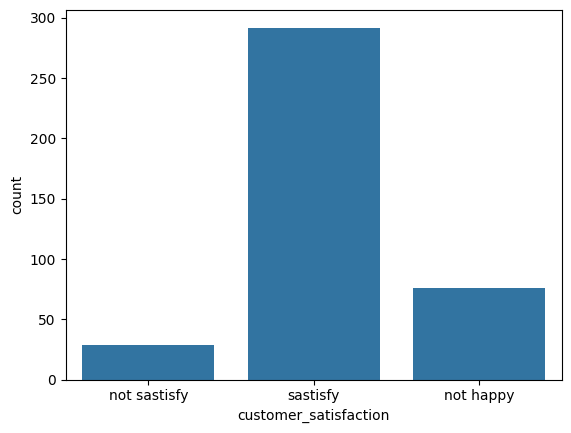

In [41]:

sns.countplot(x='customer_satisfaction', data=filter_customer_data)

In [42]:
pip install neattext

##Encoding

In [43]:
#Text cleaning
import neattext.functions as nfx

##User handles
filter_customer_data['clean_messages']=filter_customer_data['messages'].apply(nfx.remove_userhandles)

##Stopwords
filter_customer_data['clean_messages']=filter_customer_data['clean_messages'].apply(nfx.remove_stopwords)
##Special characters
filter_customer_data['clean_messages']=filter_customer_data['clean_messages'].apply(nfx.remove_special_characters)

filter_customer_data.head()

,ID,Timestamp,UI_version,source,messages,customer_satisfaction,clean_messages
0,50424,2023-11-20,v1,fb_messenger,"['{'\n '""customer"": ""I want to know how to get...",not sastisfy,customer I want know smooth shave irritation ...
1,50425,2023-11-20,v1,website,"['{'\n '""customer"": ""I thought this razor woul...",sastisfy,customer I thought razor gamechanger its prov...
2,50426,2023-11-20,v1,website,"['{'\n '""customer"": ""Hey, I need to report an ...",sastisfy,customer Hey need report issue razor purchase...
3,50427,2023-11-20,v1.1.2,website,"['{'\n '""customer"": ""Can you point me towards ...",sastisfy,customer Can point electric razor designed se...
4,50428,2023-11-20,v2.sp,tiktok,"['{'\n '""customer"": ""The trimmer attachment is...",sastisfy,customer The trimmer attachment isnt cutting ...


## Apply model

In [44]:
#Load ML Packages
##Estimator

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

## Transfomer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
#Features & Lables
##Filter cac data co customer sastifaction de tao tep train,test
filter_customer_data_not_null= filter_customer_data.dropna()

Xfeatures=filter_customer_data_not_null['clean_messages']
ylabels=filter_customer_data_not_null['customer_satisfaction']

x_predict=filter_customer_data[filter_customer_data['customer_satisfaction'].isnull()]['clean_messages']


In [46]:
#Split data
x_train, x_test, y_train, y_test=train_test_split(Xfeatures, ylabels, test_size=0.3, random_state=42)

In [47]:
#Build pipeline
from sklearn.pipeline import Pipeline

#Logistic Regression Pipeline
pipe_lr=Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [48]:
#Train and Fit data
pipe_lr.fit(x_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [49]:
#Check accuracy
pipe_lr.score(x_test, y_test)


0.9083333333333333

In [50]:
y_predict=pipe_lr.predict(x_predict)
print(y_predict)

['sastisfy' 'sastisfy' 'not happy' ... 'sastisfy' 'sastisfy' 'sastisfy']


In [51]:
#Fill nhung hang customer_satisfaction is null cua x_predict
filter_customer_data.loc[filter_customer_data['customer_satisfaction'].isna(), 'customer_satisfaction'] = y_predict



In [52]:
filter_customer_data.info()
filter_customer_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2016 non-null   int64         
 1   Timestamp              2016 non-null   datetime64[ns]
 2   UI_version             2016 non-null   object        
 3   source                 2016 non-null   object        
 4   messages               2016 non-null   object        
 5   customer_satisfaction  2016 non-null   object        
 6   clean_messages         2016 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 110.4+ KB


,ID,Timestamp,UI_version,source,messages,customer_satisfaction,clean_messages
0,50424,2023-11-20,v1,fb_messenger,"['{'\n '""customer"": ""I want to know how to get...",not sastisfy,customer I want know smooth shave irritation ...
1,50425,2023-11-20,v1,website,"['{'\n '""customer"": ""I thought this razor woul...",sastisfy,customer I thought razor gamechanger its prov...
2,50426,2023-11-20,v1,website,"['{'\n '""customer"": ""Hey, I need to report an ...",sastisfy,customer Hey need report issue razor purchase...
3,50427,2023-11-20,v1.1.2,website,"['{'\n '""customer"": ""Can you point me towards ...",sastisfy,customer Can point electric razor designed se...
4,50428,2023-11-20,v2.sp,tiktok,"['{'\n '""customer"": ""The trimmer attachment is...",sastisfy,customer The trimmer attachment isnt cutting ...


# create a visualization that displays the Satisfaction Rate by date

In [53]:
#Create table rate by date
total_review_by_date=filter_customer_data.groupby('Timestamp', as_index=0)['customer_satisfaction'].count()
total_review_by_date.rename(columns={'customer_satisfaction':'total_review'}, inplace=True)

sastify_review_by_date=filter_customer_data[filter_customer_data['customer_satisfaction']=='sastisfy'].groupby('Timestamp', as_index=0)['customer_satisfaction'].count()
sastify_review_by_date.rename(columns={'customer_satisfaction':'sastify_review'}, inplace=True)


#merge 2 bang tren voi nhau
sastify_review_by_date=pd.merge(sastify_review_by_date, total_review_by_date, on='Timestamp', how='left')
sastify_review_by_date['sastify_rate']=(sastify_review_by_date['sastify_review']/sastify_review_by_date['total_review']).round(2)*100
sastify_review_by_date.head(10)




,Timestamp,sastify_review,total_review,sastify_rate
0,2023-11-20,180,246,73.0
1,2023-11-21,238,293,81.0
2,2023-11-22,245,303,81.0
3,2023-11-23,219,270,81.0
4,2023-11-24,252,300,84.0
5,2023-11-25,263,320,82.0
6,2023-11-26,240,284,85.0


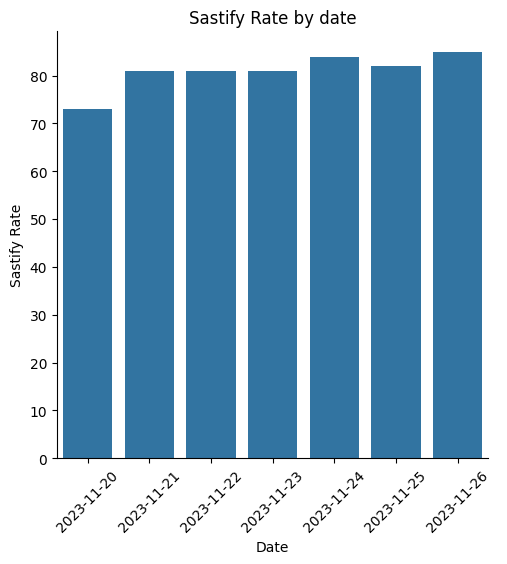

In [54]:
### Create barplot for rate by date
sns.catplot(x="Timestamp", y="sastify_rate",
            data=sastify_review_by_date, kind="bar")
plt.title('Sastify Rate by date')
plt.xlabel('Date')
plt.ylabel('Sastify Rate')
plt.xticks(rotation=45)
plt.show()